先判斷記錄數量和 19 個特徵

In [ ]:
import pandas as pd

# Load the datasets
visegrad_data_path = '/mnt/data/visegrad group.csv'
facebook_data_path = '/mnt/data/dataset_Facebook.csv'

# Read the data to get the sizes
visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv',sep=';')

# Get the data sizes
visegrad_data_size = visegrad_data.shape
facebook_data_size = facebook_data.shape

visegrad_data_size, facebook_data_size


In [1]:
import pandas as pd

# Load the datasets
dataset_facebook = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv')
visegrad_group = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')

# Display the first few rows of each dataset to understand their structure
facebook_head = dataset_facebook.head()
visegrad_head = visegrad_group.head()

facebook_head, visegrad_head

# Attempt to load the datasets again with different encoding or handling options if necessary

# Try loading with a more flexible approach, potentially adjusting for common issues like encoding
try:
    dataset_facebook = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', error_bad_lines=False)
except Exception as e_fb:
    dataset_facebook_error = str(e_fb)

try:
    visegrad_group = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv', error_bad_lines=False)
except Exception as e_vg:
    visegrad_group_error = str(e_vg)

# Check if datasets are loaded successfully, else show error
if 'dataset_facebook' in locals() and 'visegrad_group' in locals():
    facebook_head = dataset_facebook.head()
    visegrad_head = visegrad_group.head()
    result = (facebook_head, visegrad_head, "Both datasets loaded successfully.")
elif 'dataset_facebook' in locals():
    result = (dataset_facebook.head(), "Facebook dataset loaded successfully, Visegrad group dataset failed.", visegrad_group_error)
elif 'visegrad_group' in locals():
    result = ("Facebook dataset failed to load.", visegrad_group.head(), dataset_facebook_error)
else:
    result = ("Failed to load both datasets.", dataset_facebook_error, visegrad_group_error)

result

(  Page total likes;Type;Category;Post Month;Post Weekday;Post Hour;Paid;Lifetime Post Total Reach;Lifetime Post Total Impressions;Lifetime Engaged Users;Lifetime Post Consumers;Lifetime Post Consumptions;Lifetime Post Impressions by people who have liked your Page;Lifetime Post reach by people who like your Page;Lifetime People who have liked your Page and engaged with your post;comment;like;share;Total Interactions
 0  139441;Photo;2;12;4;3;0;2752;5091;178;109;159;...                                                                                                                                                                                                                                                                                                                                                                               
 1  139441;Status;2;12;3;10;0;10460;19057;1457;136...                                                                                                         

Loading and initial checking of the basics of the data set, including looking at the first few rows (to get an initial impression of the data), the shape of the data (i.e. number of rows and columns)
加載和初步檢查數據集的基本情況，包括查看頭幾行（以獲得對數據的初步印象）、數據的形狀（即行數和列數）

In [2]:
# 加載 "dataset_Facebook.csv"
try:
    facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv')
    facebook_head = facebook_data.head()
    facebook_shape = facebook_data.shape
    facebook_columns = facebook_data.columns
except Exception as e:
    facebook_error = str(e)

# 檢查 "visegrad group.csv"
try:
    visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')
    visegrad_head = visegrad_data.head()
    visegrad_shape = visegrad_data.shape
    visegrad_columns = visegrad_data.columns
except Exception as e:
    visegrad_error = str(e)

facebook_head, facebook_shape, facebook_columns, visegrad_head, visegrad_shape, visegrad_columns



(  Page total likes;Type;Category;Post Month;Post Weekday;Post Hour;Paid;Lifetime Post Total Reach;Lifetime Post Total Impressions;Lifetime Engaged Users;Lifetime Post Consumers;Lifetime Post Consumptions;Lifetime Post Impressions by people who have liked your Page;Lifetime Post reach by people who like your Page;Lifetime People who have liked your Page and engaged with your post;comment;like;share;Total Interactions
 0  139441;Photo;2;12;4;3;0;2752;5091;178;109;159;...                                                                                                                                                                                                                                                                                                                                                                               
 1  139441;Status;2;12;3;10;0;10460;19057;1457;136...                                                                                                         

k-means clustering

清理數據 : 處理缺失值，轉換數據類型，標準化，刪除異常值  
Data Cleaning: Handle missing values, convert data types, normalize, delete anomalous values

Dataset 1 - facebook_data

In [13]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 假设您的数据已经正确加载
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')  # 确保使用正确的路径和分隔符

# 处理缺失值：使用列的均值填充数值型特征的缺失值
imputer = SimpleImputer(strategy='mean')
facebook_data_numeric = facebook_data.select_dtypes(include=['int64', 'float64'])  # 选择数值型列
facebook_data[facebook_data_numeric.columns] = imputer.fit_transform(facebook_data_numeric)

# 标准化数值数据
scaler = StandardScaler()
facebook_data[facebook_data_numeric.columns] = scaler.fit_transform(facebook_data[facebook_data_numeric.columns])

# 这样，您就完成了最基本的数据清理步骤，包括处理缺失值和标准化数值数据
facebook_data.head(), facebook_data.shape


(   Page total likes    Type  Category  Post Month  Post Weekday  Post Hour  \
 0          0.999403   Photo  0.140875    1.501531     -0.073940  -1.109019   
 1          0.999403  Status  0.140875    1.501531     -0.566874   0.494934   
 2          0.999403   Photo  1.314829    1.501531     -0.566874  -1.109019   
 3          0.999403   Photo  0.140875    1.501531     -1.059808   0.494934   
 4          0.999403   Photo  0.140875    1.501531     -1.059808  -1.109019   
 
        Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
 0 -0.622001                  -0.490859                        -0.319251   
 1 -0.622001                  -0.151569                        -0.137227   
 2 -0.622001                  -0.505781                        -0.328608   
 3  1.610937                   1.594532                         0.761212   
 4 -0.622001                  -0.293131                        -0.208428   
 
    Lifetime Engaged Users  Lifetime Post Consumers  \
 0         

Dataset 2 - visegrad_data

In [11]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 加载 "visegrad group.csv" 并进行数据清理

visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')  # 假设使用分号作为分隔符

# 处理缺失值：使用列的均值填充数值型特征的缺失值
visegrad_data_numeric = visegrad_data.select_dtypes(include=['int64', 'float64'])  # 选择数值型列
visegrad_data[visegrad_data_numeric.columns] = imputer.fit_transform(visegrad_data_numeric)

# 标准化数值数据
visegrad_data[visegrad_data_numeric.columns] = scaler.fit_transform(visegrad_data[visegrad_data_numeric.columns])

# 确认数据清理后的基本情况
visegrad_data.head(), visegrad_data.shape


(   Unnamed: 0  CustomerID Gender Location  Tenure_Months  Transaction_ID  \
 0   -1.732018    1.417474      M  Chicago      -1.048521       -1.819422   
 1   -1.731953    1.417474      M  Chicago      -1.048521       -1.819307   
 2   -1.731887    1.417474      M  Chicago      -1.048521       -1.817456   
 3   -1.731822    1.417474      M  Chicago      -1.048521       -1.817109   
 4   -1.731756    1.417474      M  Chicago      -1.048521       -1.816993   
 
   Transaction_Date     Product_SKU  \
 0       2019-01-01  GGOENEBJ079499   
 1       2019-01-01  GGOENEBJ079499   
 2       2019-01-01  GGOENEBQ078999   
 3       2019-01-01  GGOENEBQ079099   
 4       2019-01-01  GGOENEBJ079499   
 
                                  Product_Description Product_Category  ...  \
 0  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
 1  Nest Learning Thermostat 3rd Gen-USA - Stainle...         Nest-USA  ...   
 2             Nest Cam Outdoor Security Camera - USA         N

第一部分输出是调用 isnull().sum() 后的结果，这表明在您的 facebook_data 数据集中：

所有列除了 'Paid'、'like' 和 'share' 外，都没有缺失值（即 NaN 值的数量为 0）。
'Paid' 列有 1 个缺失值，'like' 列有 1 个缺失值，'share' 列有 4 个缺失值。
第二部分输出是在使用 SimpleImputer 填充缺失值并转换之后，调用 np.isnan(facebook_data_numeric).sum() 得到的结果，输出 0 表示在数值型的数据中没有 NaN 值，说明 SimpleImputer 成功填充了所有缺失值。目前Paid, like, share 有缺失值還未補上

In [16]:
# 确认是否存在 NaN 值
print(facebook_data_numeric.isnull().sum())

# 应用 SimpleImputer
imputer = SimpleImputer(strategy='mean')
facebook_data_numeric = imputer.fit_transform(facebook_data_numeric)

# 确认填充后是否还存在 NaN 值
print(np.isnan(facebook_data_numeric).sum())

# 现在可以继续应用 StandardScaler
scaler = StandardScaler()
facebook_data_numeric = scaler.fit_transform(facebook_data_numeric)

# 再次运行 KMeans 聚类
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(facebook_data_numeric)
    sse[k] = kmeans.inertia_


Page total likes                                                       0
Category                                                               0
Post Month                                                             0
Post Weekday                                                           0
Post Hour                                                              0
Paid                                                                   1
Lifetime Post Total Reach                                              0
Lifetime Post Total Impressions                                        0
Lifetime Engaged Users                                                 0
Lifetime Post Consumers                                                0
Lifetime Post Consumptions                                             0
Lifetime Post Impressions by people who have liked your Page           0
Lifetime Post reach by people who like your Page                       0
Lifetime People who have liked your Page and engage

首先，我们需要计算这些列的众数和均值。
检查填充后是否还存在缺失值

In [17]:
# 根据您的描述，我们将填充包含缺失值的列。
# 对于二元特征 'Paid'，我们将使用众数来填充缺失值。
# 对于 'like' 和 'share' 特征，我们将使用均值来填充缺失值。

# 首先，我们需要计算这些列的众数和均值
paid_mode = facebook_data['Paid'].mode()[0]  # 众数
like_mean = facebook_data['like'].mean()     # 均值
share_mean = facebook_data['share'].mean()   # 均值

# 使用计算得到的值来填充缺失值
facebook_data['Paid'].fillna(paid_mode, inplace=True)
facebook_data['like'].fillna(like_mean, inplace=True)
facebook_data['share'].fillna(share_mean, inplace=True)

# 检查填充后是否还存在缺失值
missing_values_after_filling = facebook_data[['Paid', 'like', 'share']].isnull().sum()

missing_values_after_filling


Paid     0
like     0
share    0
dtype: int64

Dataset-1 Facebook Dataset
計算SSE(總平方誤差)，使用 KMeans - Elbow method算法分别進行聚類，並計算每個聚類配置的總平方誤差（SSE）。修改代碼時遇到幾次Name Error問題，會將先前整理好的代碼合併，以及使用輪廓分數(值越接近 1，表示聚类效果越好。)

使用肘方法，找到K值(最佳的K值，是 总平方误差SSE 下降开始变缓的那个点)
Using the elbow method, find the value of K. (The optimal value of K is the point at which the decline in the total squared error SSE starts to slow down.)

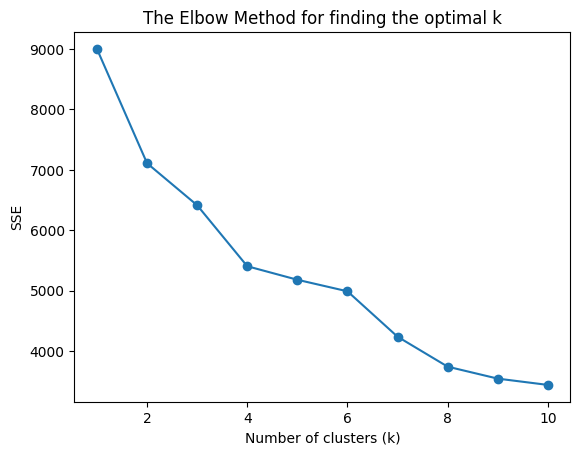

         Page total likes  Category  Post Month  Post Weekday  Post Hour  \
Cluster                                                                    
0               -1.061938  0.196446   -1.042866     -0.012688   0.290203   
1                0.119443 -0.200910    0.045958      0.119490   0.138178   
2                0.693287 -0.071286    0.704304     -0.020489  -0.242167   
3               -0.865591  0.140875   -0.919317     -0.731185   0.113040   

             Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  \
Cluster                                                                         
0       -0.063389                  -0.251010                        -0.222990   
1        0.197685                   1.375400                         0.792371   
2       -0.021170                  -0.309128                        -0.205071   
3        0.122312                   3.578976                         8.716900   

         Lifetime Engaged Users  Lifetime Post Consumers

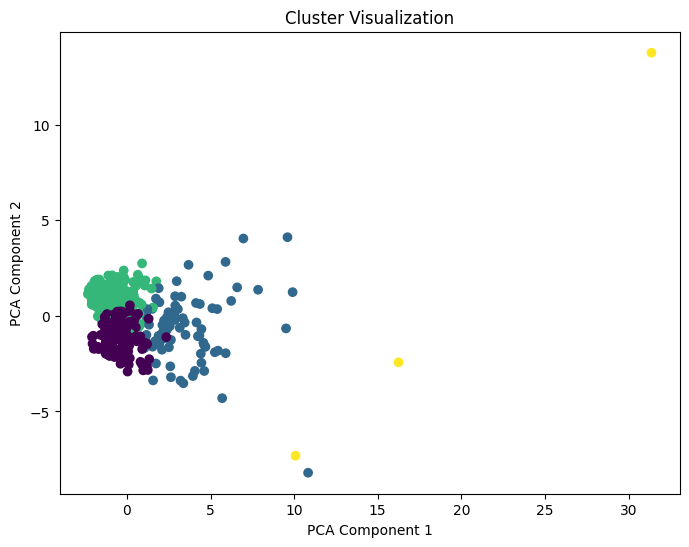

In [10]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# 加载数据
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# 选择数值型特征进行处理
numeric_cols = facebook_data.select_dtypes(include=['int64', 'float64']).columns  # 选择数值型列
imputer = SimpleImputer(strategy='mean')
facebook_data[numeric_cols] = imputer.fit_transform(facebook_data[numeric_cols])

# 标准化数值型特征
scaler = StandardScaler()
facebook_data[numeric_cols] = scaler.fit_transform(facebook_data[numeric_cols])


#=======================================================================================================



# 运行 KMeans 聚类和计算 SSE
sse = {}
for k in range(1, 11):  # 测试不同的 k 值，从 1 到 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(facebook_data[numeric_cols])  # 仅对数值型列进行聚类
    sse[k] = kmeans.inertia_  # 存储每个 k 值的 SSE

# 绘制肘部图形
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method for finding the optimal k')
plt.show()

# 基于肘部图形选择 k 值
optimal_k = 4

# 使用最佳 k 值重新运行 KMeans 聚类
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(facebook_data[numeric_cols])  # 仅对数值型列进行聚类

# 获取聚类标签
labels = kmeans.labels_

# 将聚类标签添加到原始 DataFrame 中，以便进一步分析
facebook_data['Cluster'] = labels

# 只对数值型列计算每个聚类的平均值
cluster_summary = facebook_data[numeric_cols.tolist() + ['Cluster']].groupby('Cluster').mean()
print(cluster_summary)




# 评估聚类质量：计算轮廓分数
silhouette_avg = silhouette_score(facebook_data[numeric_cols], labels)
print("For n_clusters =", optimal_k, "The average silhouette_score is :", silhouette_avg)

# 进行 PCA 降维以便可视化
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
facebook_data_pca = pca.fit_transform(facebook_data[numeric_cols])

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(facebook_data_pca[:, 0], facebook_data_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()



聚类的分离：大部分聚类看起来都比较紧密且分开，这表明聚类效果不错。
异常点：有一些可能的离群点，例如图表右上角的黄色点。这些可能是异常值或非典型的观察结果。
聚类的密度和形状：有些聚类看起来更紧密（更高的点密度），而有些则更散开。这可能表示聚类内的变异性不同。

Dataset-2 visegrad group 資料庫進行資料整理，最終檢查缺失值為0，因此沒有需要另外移除或者填補的欄位

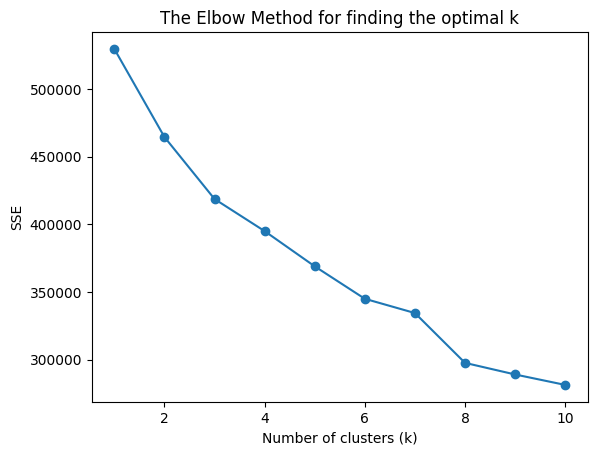

             Type  Tenure_Months  Quantity  Avg_Price  Delivery_Charges  \
Cluster                                                                   
0       -0.641036       0.034942  0.059461  -0.591457          0.029156   
1        0.868303      -0.050260  0.064223  -0.464781          0.111054   
2       -0.280356       0.018717 -0.143735   1.225659         -0.163768   

              GST  Offline_Spend  Online_Spend     Month  Discount_pct  Year  
Cluster                                                                       
0        0.582283       0.152010      0.091471  0.215247      0.638723   0.0  
1        0.311095      -0.350395     -0.223503 -0.350175     -0.758626   0.0  
2       -1.034900       0.235902      0.156792  0.162866      0.154418   0.0  
For n_clusters = 3 The average silhouette_score is : 0.14733933043200775


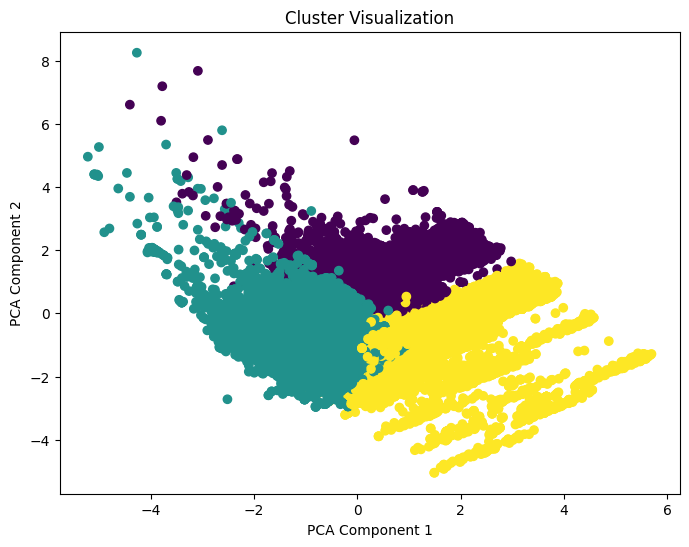

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



# 加载数据
visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')

# 移除不相关的列，例如 'CustomerID' 和 'Transaction_ID'
visegrad_data.drop(['CustomerID', 'Transaction_ID'], axis=1, inplace=True)

# 如果 'Date' 列是字符串格式，转换为 datetime
visegrad_data['Date'] = pd.to_datetime(visegrad_data['Date'], errors='coerce')

# 提取 'Date' 列的年份和月份作为新的特征
visegrad_data['Year'] = visegrad_data['Date'].dt.year
visegrad_data['Month'] = visegrad_data['Date'].dt.month

# 移除原始的 'Date' 列
visegrad_data.drop('Date', axis=1, inplace=True)

# 对分类数据进行独热编码
visegrad_data = pd.get_dummies(visegrad_data, drop_first=True)

# 为数值型数据创建 imputer 对象
numeric_cols = visegrad_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
visegrad_data[numeric_cols] = imputer.fit_transform(visegrad_data[numeric_cols])

# 检查数据中的缺失值
missing_values = visegrad_data.isnull().sum()
missing_values

# 创建标准化器对象并应用于数值型数据
scaler = StandardScaler()
visegrad_data[numeric_cols] = scaler.fit_transform(visegrad_data[numeric_cols])

# ------------------------------------------------------------------------------------------------------------------------------------------

# 运行 KMeans 聚类和计算 SSE
sse = {}
for k in range(1, 11):  # 测试不同的 k 值，从 1 到 10
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(visegrad_data[numeric_cols])  # 仅对数值型列进行聚类
    sse[k] = kmeans.inertia_  # 存储每个 k 值的 SSE

# 绘制肘部图形
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()), marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('SSE')
plt.title('The Elbow Method for finding the optimal k')
plt.show()

# 基于肘部图形选择 k 值
optimal_k = 3

# 使用最佳 k 值重新运行 KMeans 聚类
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(visegrad_data[numeric_cols])  # 仅对数值型列进行聚类

# 获取聚类标签
labels = kmeans.labels_

# 将聚类标签添加到原始 DataFrame 中，以便进一步分析
visegrad_data['Cluster'] = labels

# 只对数值型列计算每个聚类的平均值
cluster_summary = visegrad_data[numeric_cols.tolist() + ['Cluster']].groupby('Cluster').mean()
print(cluster_summary)

# 评估聚类质量：计算轮廓分数
silhouette_avg = silhouette_score(visegrad_data[numeric_cols], labels)
print("For n_clusters =", optimal_k, "The average silhouette_score is :", silhouette_avg)

# 进行 PCA 降维以便可视化
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
visegrad_data_pca = pca.fit_transform(visegrad_data[numeric_cols])

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(visegrad_data_pca[:, 0], visegrad_data_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.show()



Gaussian Mixture Model, GMM

Dataset-1 Facebook dataset

使用 AIC（赤池信息量准则）或 BIC（贝叶斯信息量准则）来帮助确定最佳的组件数量。

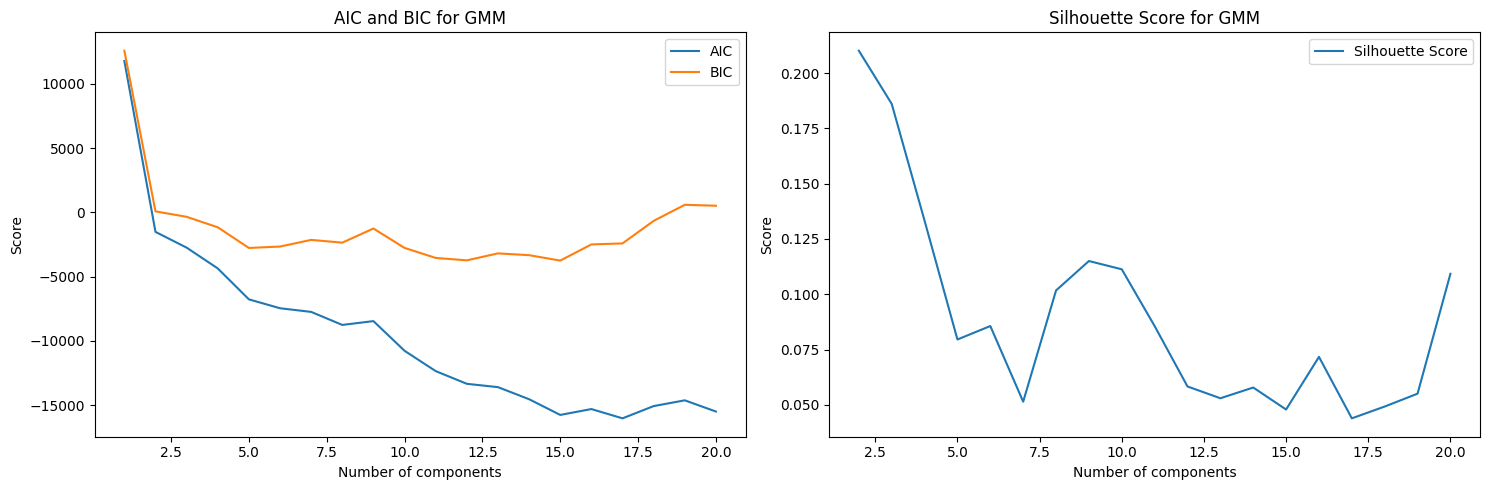

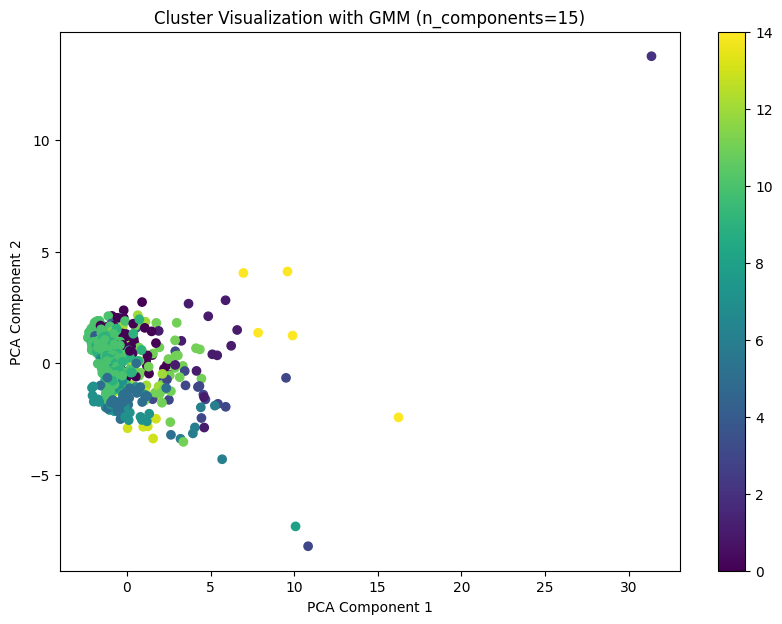

In [13]:
# 导入必要的库
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score

# 加载数据
file_path = r'C:\Users\isabe\Downloads\dataset_Facebook.csv'
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# 选择数值型特征进行处理
numeric_cols = facebook_data.select_dtypes(include=['int64', 'float64']).columns  # 选择数值型列
imputer = SimpleImputer(strategy='mean')
facebook_data[numeric_cols] = imputer.fit_transform(facebook_data[numeric_cols])

# 标准化数值型特征
scaler = StandardScaler()
facebook_data[numeric_cols] = scaler.fit_transform(facebook_data[numeric_cols])

#================================================================================================

# 假设 facebook_data 已经是标准化后的数据
# 设定要测试的组件数范围
n_components_range = np.arange(1, 21)
aic_values = []
bic_values = []
silhouette_scores = []

# 计算 AIC, BIC 和轮廓系数
# 计算 AIC, BIC 和轮廓系数
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(facebook_data[numeric_cols])
    labels = gmm.predict(facebook_data[numeric_cols])
    aic_values.append(gmm.aic(facebook_data[numeric_cols]))
    bic_values.append(gmm.bic(facebook_data[numeric_cols]))
    # 跳过 n_components 为 1 的情况
    if n > 1:
        silhouette_scores.append(silhouette_score(facebook_data[numeric_cols], labels))
    else:
        silhouette_scores.append(None)


# 绘制 AIC 和 BIC
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')
plt.title('AIC and BIC for GMM')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()

# 绘制轮廓系数
plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, label='Silhouette Score')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()

# 选择具有最佳 BIC 的模型
optimal_n = np.argmin(bic_values) + 1  # 加1是因为索引从0开始而组件数从1开始
optimal_gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=0)
optimal_gmm.fit(facebook_data[numeric_cols])
optimal_labels = optimal_gmm.predict(facebook_data[numeric_cols])

# 进行 PCA 降维以便可视化
pca = PCA(n_components=2)
facebook_data_pca = pca.fit_transform(facebook_data[numeric_cols])

# 可视化聚类结果
plt.figure(figsize=(10, 7))
plt.scatter(facebook_data_pca[:, 0], facebook_data_pca[:, 1], c=optimal_labels, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Cluster Visualization with GMM (n_components={optimal_n})')
plt.colorbar()
plt.show()



Dataset-2 visegrad group

運行了幾次代碼跑的時間非常久，目前懷疑有幾個可能性:數據量大(GMM 擬合可能會需要相對較長的時間), 高維度(GMM 在高维空間中的計算開銷較大。), 多次擬合GMM
最後發現是有52,955 條記錄和 21 個特徵，考慮到Facebook dataset只有500條紀錄，因此只會使用到前500條紀錄，以便於比較

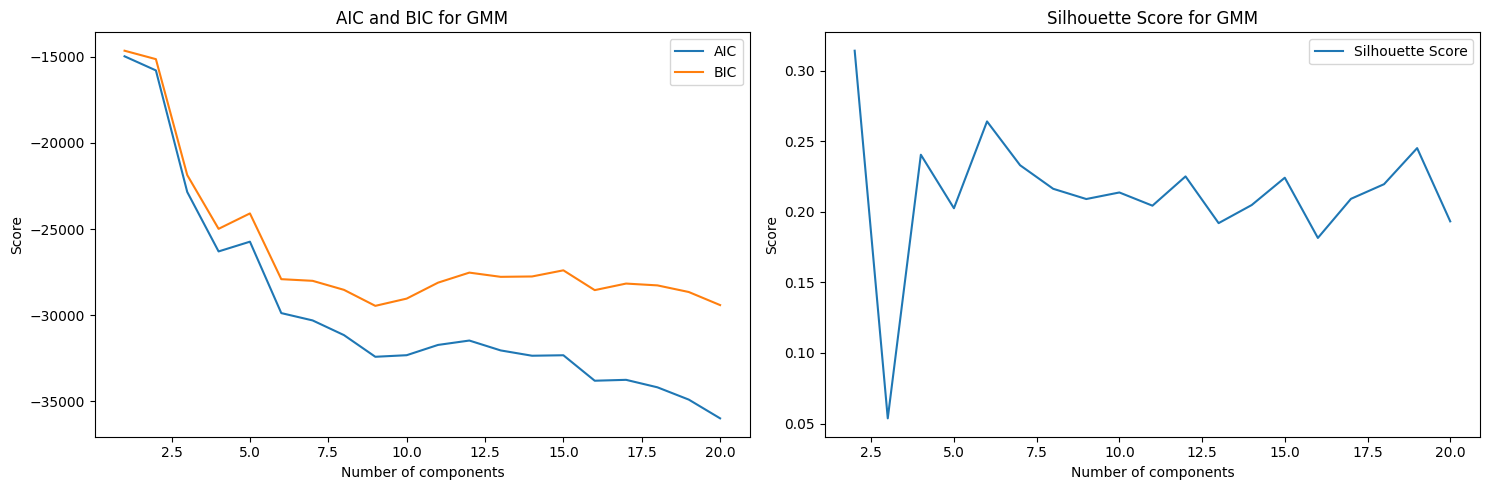

c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(


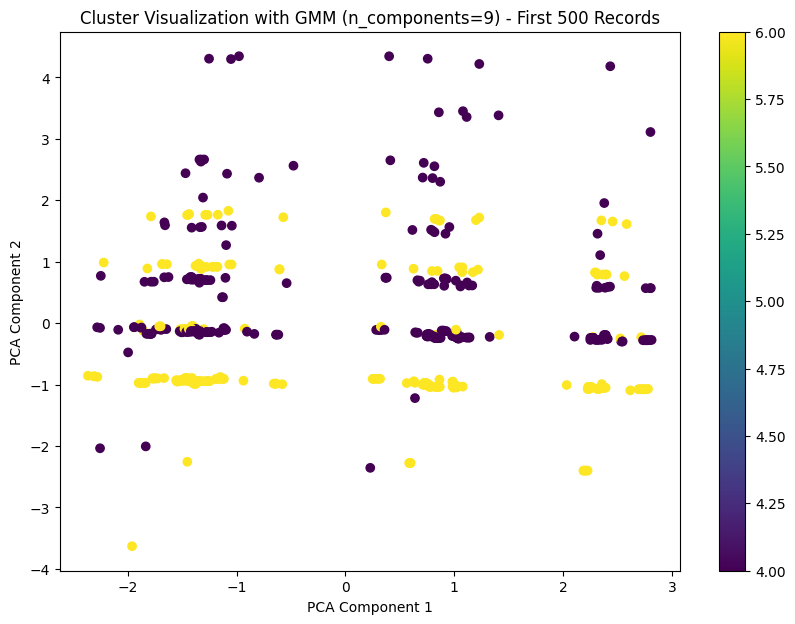

In [7]:
# 导入必要的库
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 加载数据
file_path = '/mnt/data/visegrad group.csv'
visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')

# 移除不相关的列，例如 'CustomerID' 和 'Transaction_ID'
visegrad_data.drop(['CustomerID', 'Transaction_ID'], axis=1, inplace=True)

# 如果 'Date' 列是字符串格式，转换为 datetime
visegrad_data['Date'] = pd.to_datetime(visegrad_data['Date'], errors='coerce')

# 提取 'Date' 列的年份和月份作为新的特征
visegrad_data['Year'] = visegrad_data['Date'].dt.year
visegrad_data['Month'] = visegrad_data['Date'].dt.month

# 移除原始的 'Date' 列
visegrad_data.drop('Date', axis=1, inplace=True)

# 对分类数据进行独热编码
visegrad_data = pd.get_dummies(visegrad_data, drop_first=True)

# 为数值型数据创建 imputer 对象
numeric_cols = visegrad_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
visegrad_data[numeric_cols] = imputer.fit_transform(visegrad_data[numeric_cols])

# 检查数据中的缺失值
missing_values = visegrad_data.isnull().sum()
missing_values

# 创建标准化器对象并应用于数值型数据
scaler = StandardScaler()
visegrad_data[numeric_cols] = scaler.fit_transform(visegrad_data[numeric_cols])

#================================================================================================

# 假设 facebook_data 已经是标准化后的数据
# 设定要测试的组件数范围
# 修改代碼以只使用 visegrad 數據集的前 500 條記錄
# 選擇數值型特徵進行處理
numeric_cols = visegrad_data.iloc[:500].select_dtypes(include=['int64', 'float64']).columns

# 使用 Imputer 填充缺失值
imputer = SimpleImputer(strategy='mean')
visegrad_data_subset = visegrad_data.iloc[:500].copy()
visegrad_data_subset[numeric_cols] = imputer.fit_transform(visegrad_data_subset[numeric_cols])

# 標準化數值型特徵
scaler = StandardScaler()
visegrad_data_standardized = scaler.fit_transform(visegrad_data_subset[numeric_cols])

# 設定要測試的組件數範圍
n_components_range = np.arange(1, 21)
aic_values = []
bic_values = []
silhouette_scores = []

# 計算 AIC, BIC 和輪廓系數
for n in n_components_range:
    gmm = GaussianMixture(n_components=n, covariance_type='full', random_state=0)
    gmm.fit(visegrad_data_standardized)
    labels = gmm.predict(visegrad_data_standardized)
    aic_values.append(gmm.aic(visegrad_data_standardized))
    bic_values.append(gmm.bic(visegrad_data_standardized))
    # 跳過 n_components 為 1 的情況
    if n > 1:
        silhouette_scores.append(silhouette_score(visegrad_data_standardized, labels))
    else:
        silhouette_scores.append(None)



# 绘制 AIC 和 BIC
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(n_components_range, aic_values, label='AIC')
plt.plot(n_components_range, bic_values, label='BIC')
plt.title('AIC and BIC for GMM')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()

# 绘制轮廓系数
plt.subplot(1, 2, 2)
plt.plot(n_components_range, silhouette_scores, label='Silhouette Score')
plt.title('Silhouette Score for GMM')
plt.xlabel('Number of components')
plt.ylabel('Score')
plt.legend()
plt.tight_layout()
plt.show()


# 选择具有最佳 BIC 的模型
optimal_n = np.argmin(bic_values) + 1  # 加1是因为索引从0开始而组件数从1开始
optimal_gmm = GaussianMixture(n_components=optimal_n, covariance_type='full', random_state=0)
optimal_gmm.fit(visegrad_data[numeric_cols])
optimal_labels = optimal_gmm.predict(visegrad_data[numeric_cols])

# 进行 PCA 降维以便可视化，而且只調閱前500條


pca = PCA(n_components=2)
visegrad_data_pca_subset = pca.fit_transform(visegrad_data_standardized)


optimal_labels_subset = optimal_gmm.predict(visegrad_data_standardized)


plt.figure(figsize=(10, 7))
plt.scatter(visegrad_data_pca_subset[:, 0], visegrad_data_pca_subset[:, 1], c=optimal_labels_subset, cmap='viridis', marker='o')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title(f'Cluster Visualization with GMM (n_components={optimal_n}) - First 500 Records')
plt.colorbar()
plt.show()


PCA

Dataset-1 facebook_data

展示了隨著主成分數量增加，累積解釋的方差比例是如何增加的。這個圖可以幫助我們選擇一個合理的主成分數量，以便保留足夠的數據信息，同時減少特徵數量
如果一個主成分的負載量在某個特定特徵上特別高，那麼這個主成分可以被視為主要表示該特徵的變異性

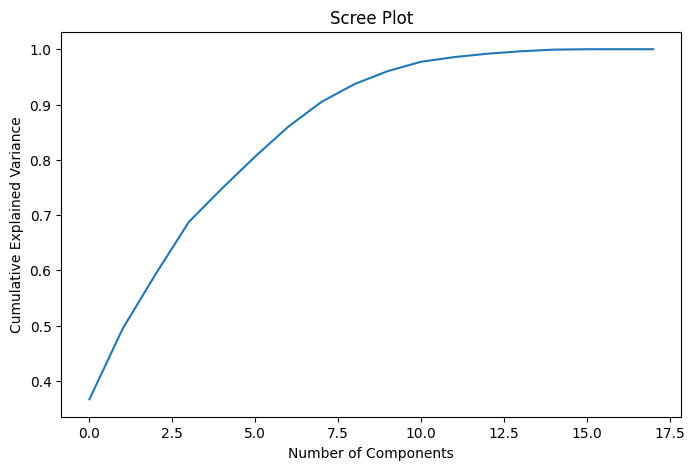

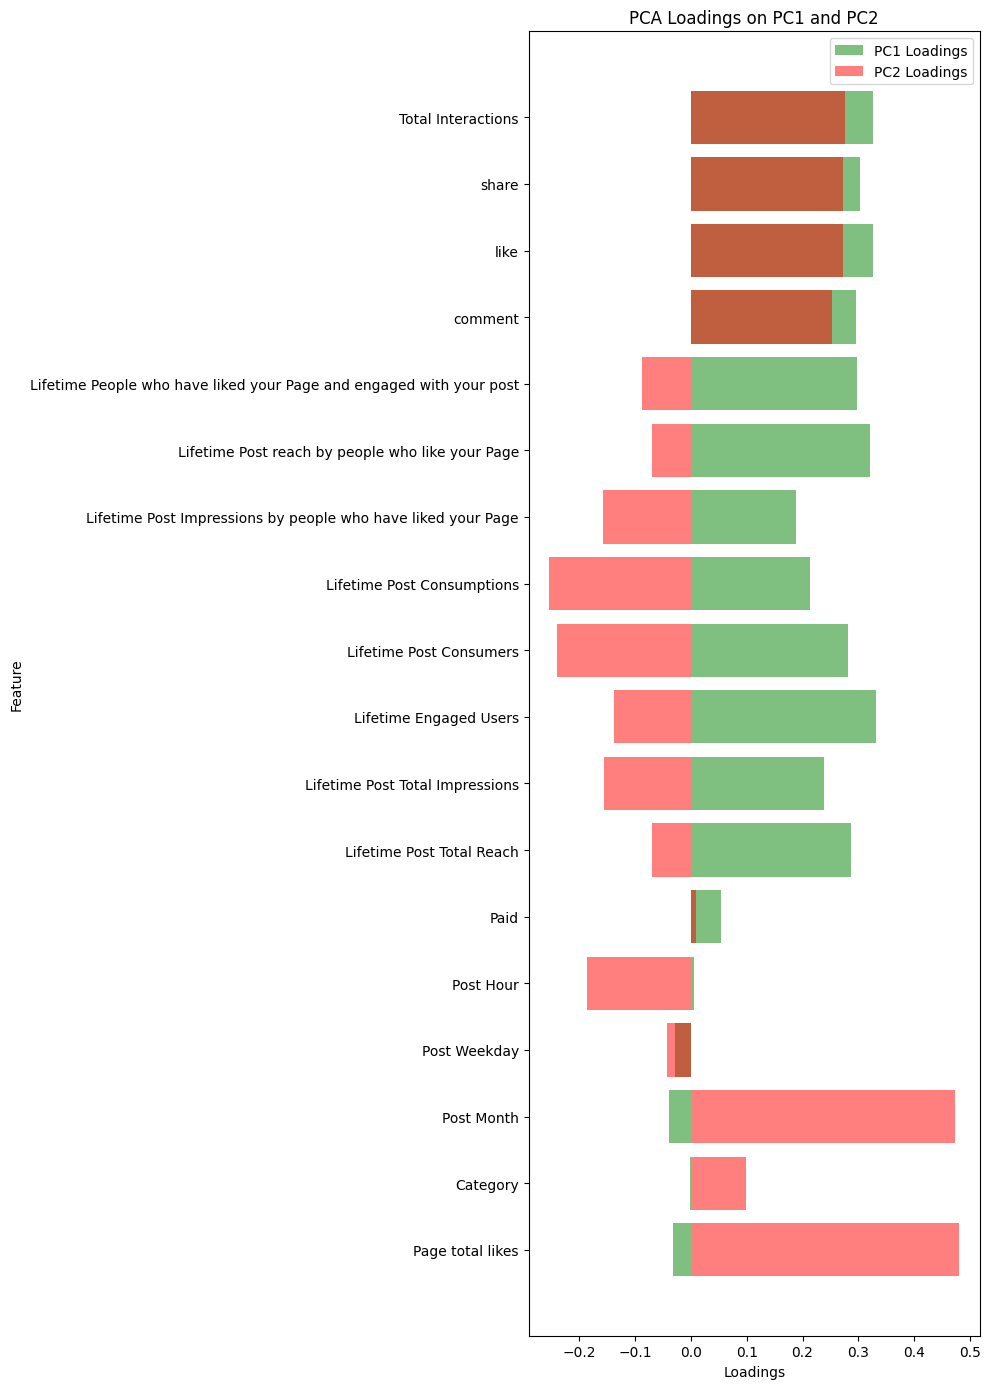

In [14]:
# 載入 Facebook 數據集
facebook_data_path = '/mnt/data/dataset_Facebook.csv'
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# 去除非數字型的列，因為 PCA 只適用於數字型數據
facebook_numeric_data = facebook_data.select_dtypes(include=[np.number])

# 檢查缺失值並去除包含缺失值的行（如果有的話）
facebook_numeric_data = facebook_numeric_data.dropna()

# 標準化數據
scaler = StandardScaler()
facebook_standardized_data = scaler.fit_transform(facebook_numeric_data)

# 應用 PCA
pca = PCA(n_components=2)  # 先以 2 個主成分開始，以便進行簡單的視覺化
facebook_pca_result = pca.fit_transform(facebook_standardized_data)

# 計算並顯示解釋方差比例，了解前兩個主成分包含了多少信息（變異性）
explained_variance = pca.explained_variance_ratio_

# 繪製屏幕圖，查看每個成分的解釋方差
pca_all = PCA().fit(facebook_standardized_data)
explained_variance_all = pca_all.explained_variance_ratio_

# 創建屏幕圖

plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_all))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# 顯示解釋方差和降維後的數據的前五個結果
explained_variance, facebook_pca_result[:5]  # 顯示 PCA 轉換後的前五個結果

# 計算並顯示前兩個主成分的負載量
loadings = pca.components_.T
loading_matrix = pd.DataFrame(loadings, index=facebook_numeric_data.columns, columns=['PC1', 'PC2'])

loading_matrix

# 繪製主成分的負載量圖，PC1 保持綠色，PC2 使用對比色（例如紅色）以提高閱讀性
plt.figure(figsize=(10, 14))
plt.barh(range(len(loading_matrix['PC1'])), loading_matrix['PC1'], alpha=0.5, color='green', label='PC1 Loadings')
plt.barh(range(len(loading_matrix['PC2'])), loading_matrix['PC2'], alpha=0.5, color='red', label='PC2 Loadings')
plt.yticks(range(len(loading_matrix['PC1'])), loading_matrix.index)
plt.ylabel('Feature')
plt.xlabel('Loadings')
plt.title('PCA Loadings on PC1 and PC2')
plt.legend()
plt.tight_layout()
plt.show()




In [ ]:
屏幕图（Scree Plot）：展示了随着主成分数量增加，累积解释的方差比例如何增加。这有助于选择应保留的主成分数量。

主成分的负载量图：显示了 PC1 和 PC2 的负载量，其中绿色代表 PC1，红色代表 PC2。通过这个图，我们可以看到不同特徵在两个主成分上的贡献。

Dataset-2 visegrad group

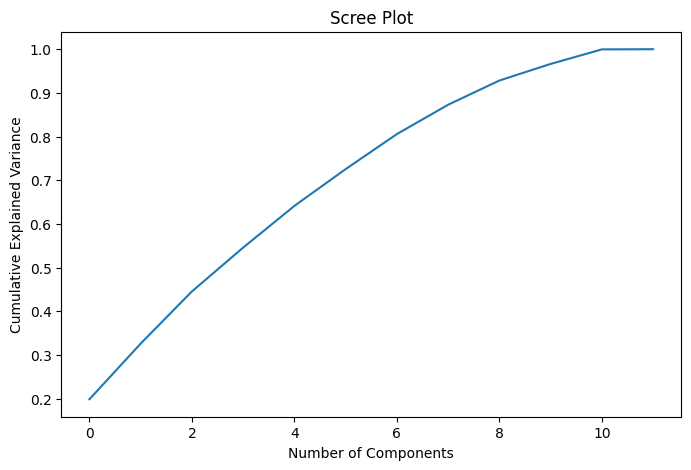

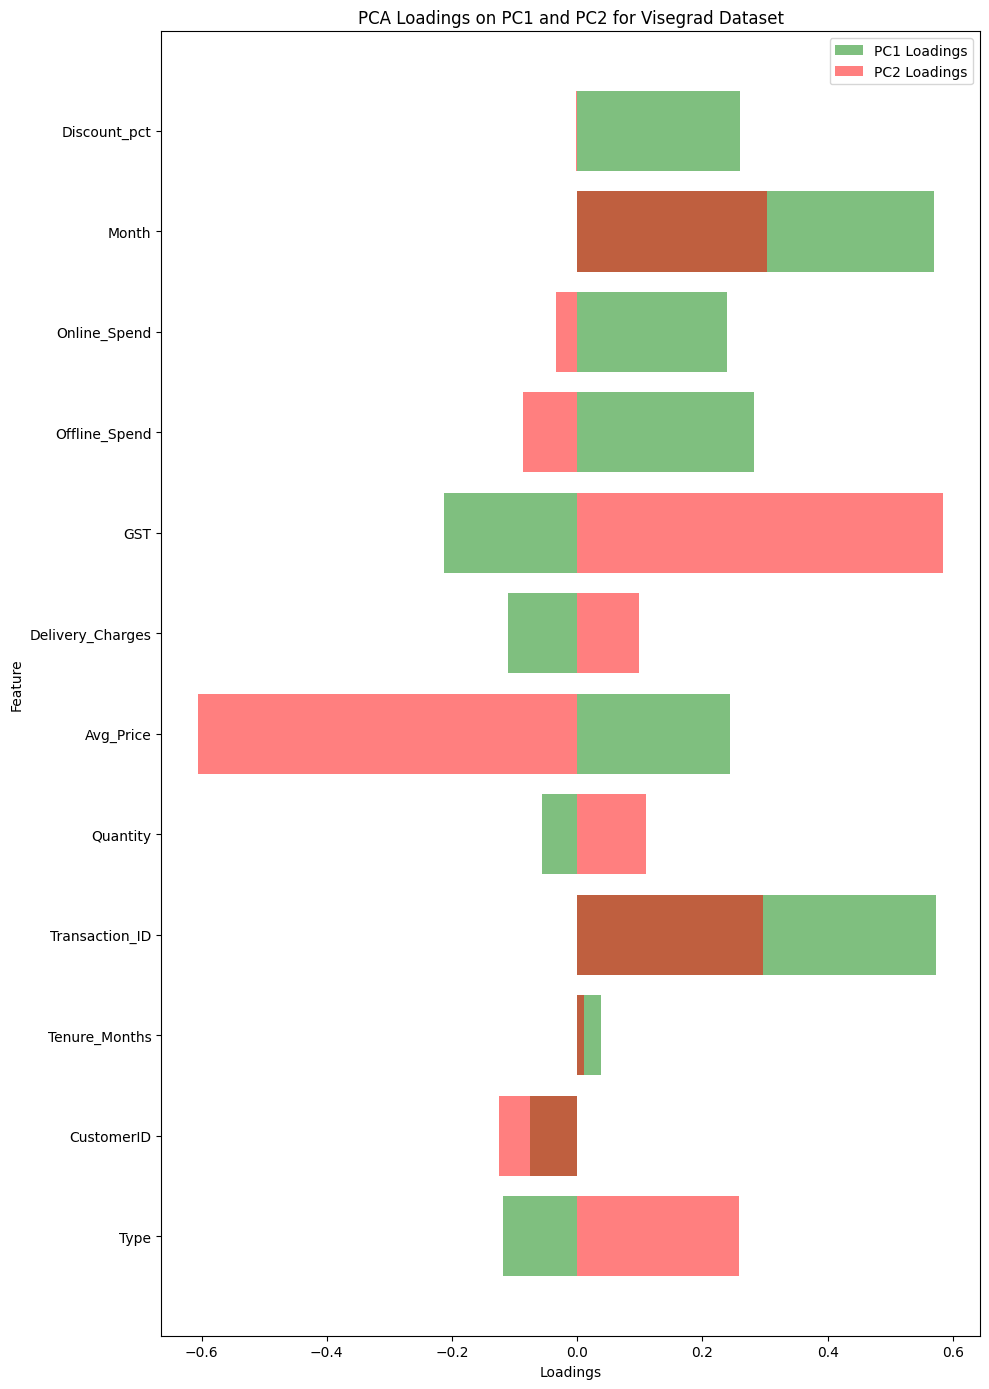

In [21]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# 加载数据
file_path = '/mnt/data/visegrad group.csv'
visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')

# 移除不相关的列，例如 'CustomerID' 和 'Transaction_ID'
visegrad_data.drop(['CustomerID', 'Transaction_ID'], axis=1, inplace=True)

# 如果 'Date' 列是字符串格式，转换为 datetime
visegrad_data['Date'] = pd.to_datetime(visegrad_data['Date'], errors='coerce')

# 提取 'Date' 列的年份和月份作为新的特征
visegrad_data['Year'] = visegrad_data['Date'].dt.year
visegrad_data['Month'] = visegrad_data['Date'].dt.month

# 移除原始的 'Date' 列
visegrad_data.drop('Date', axis=1, inplace=True)

# 对分类数据进行独热编码
visegrad_data = pd.get_dummies(visegrad_data, drop_first=True)

# 为数值型数据创建 imputer 对象
numeric_cols = visegrad_data.select_dtypes(include=['int64', 'float64']).columns
imputer = SimpleImputer(strategy='mean')
visegrad_data[numeric_cols] = imputer.fit_transform(visegrad_data[numeric_cols])

# 检查数据中的缺失值
missing_values = visegrad_data.isnull().sum()
missing_values

# 创建标准化器对象并应用于数值型数据
scaler = StandardScaler()
visegrad_data[numeric_cols] = scaler.fit_transform(visegrad_data[numeric_cols])

# 应用 PCA
pca = PCA(n_components=2)  # 选用两个主成分进行简化的可视化
visegrad_pca_result = pca.fit_transform(visegrad_standardized_data)

# 计算并显示解释方差比例
explained_variance = pca.explained_variance_ratio_

# 绘制屏幕图
pca_all = PCA().fit(visegrad_standardized_data)
explained_variance_all = pca_all.explained_variance_ratio_
plt.figure(figsize=(8, 5))
plt.plot(np.cumsum(explained_variance_all))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Scree Plot')
plt.show()

# 计算前两个主成分的负载量
loadings = pca.components_.T
loading_matrix_visegrad = pd.DataFrame(loadings, index=visegrad_numeric_data.columns, columns=['PC1', 'PC2'])

# 绘制主成分的负载量图，PC1 用绿色，PC2 用红色
plt.figure(figsize=(10, 14))
plt.barh(range(len(loading_matrix_visegrad['PC1'])), loading_matrix_visegrad['PC1'], alpha=0.5, color='green', label='PC1 Loadings')
plt.barh(range(len(loading_matrix_visegrad['PC2'])), loading_matrix_visegrad['PC2'], alpha=0.5, color='red', label='PC2 Loadings')
plt.yticks(range(len(loading_matrix_visegrad['PC1'])), loading_matrix_visegrad.index)
plt.ylabel('Feature')
plt.xlabel('Loadings')
plt.title('PCA Loadings on PC1 and PC2 for Visegrad Dataset')
plt.legend()
plt.tight_layout()
plt.show()


ICA

Dataset-1 facebook_data
r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';'

   Component_1  Component_2  Component_3  Component_4  Component_5
0    -0.513068     0.250130    -0.307050     1.340455     0.574306
1     0.302568     0.056150    -0.271440     1.044669    -0.766819
2    -1.287931     0.329996    -0.381575     1.222551     0.550335
3    -0.315620    -3.674013     0.568794     1.249451     0.443434
4    -0.880271    -0.457853    -0.387474     1.330049     0.375318
For n_clusters = 2 The average silhouette_score is : 0.35694578499720353
For n_clusters = 3 The average silhouette_score is : 0.23779196666082897
For n_clusters = 4 The average silhouette_score is : 0.22830765989109453
For n_clusters = 5 The average silhouette_score is : 0.21598712184629268
For n_clusters = 6 The average silhouette_score is : 0.22048505435200663
For n_clusters = 7 The average silhouette_score is : 0.23377293737869287
For n_clusters = 8 The average silhouette_score is : 0.2509374773042805
For n_clusters = 9 The average silhouette_score is : 0.28526417817065625
For n_clusters 

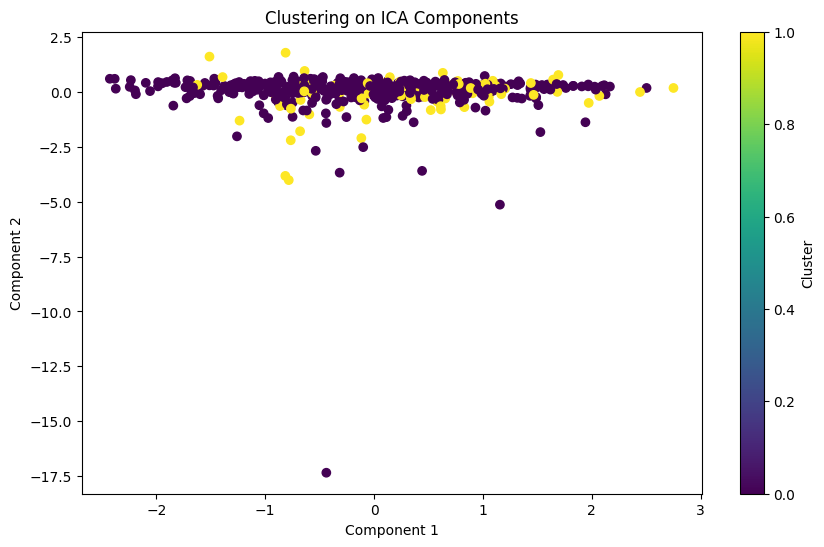

In [34]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score

# 加载数据
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# 选择数值型特征进行处理
numeric_cols = facebook_data.select_dtypes(include=['int64', 'float64']).columns  # 选择数值型列
imputer = SimpleImputer(strategy='mean')
facebook_data[numeric_cols] = imputer.fit_transform(facebook_data[numeric_cols])

# 标准化数值型特征
scaler = StandardScaler()
facebook_data[numeric_cols] = scaler.fit_transform(facebook_data[numeric_cols])

from sklearn.decomposition import FastICA
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

# 你已经有了facebook_data这个DataFrame
X = facebook_data[numeric_cols].values  # 使用正确的DataFrame和数值型特征

# 由于你之前已经进行了标准化，这里可以直接应用ICA而无需重新标准化
# 应用ICA
ica = FastICA(n_components=5, random_state=0)
X_transformed = ica.fit_transform(X)

# 将转换后的数据转换为DataFrame，方便分析
ica_df = pd.DataFrame(X_transformed, columns=[f'Component_{i+1}' for i in range(5)])

# 查看ICA成分
print(ica_df.head())


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 假设我们使用ICA转换后的数据：X_transformed

# 测试不同的聚类数量以找到最佳聚类数
range_n_clusters = list(range(2, 11))  # 测试2到10个聚类
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

# 选择轮廓系数最高的聚类数作为最佳聚类数
best_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
print("Best number of clusters:", best_n_clusters)

# 使用最佳聚类数再次执行K-Means聚类
kmeans = KMeans(n_clusters=best_n_clusters, random_state=10)
clusters = kmeans.fit_predict(X_transformed)

# 将聚类结果添加到ICA成分DataFrame中
ica_df['Cluster'] = clusters

# 可视化聚类结果（如果可能的话）
plt.figure(figsize=(10, 6))
plt.scatter(ica_df['Component_1'], ica_df['Component_2'], c=ica_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clustering on ICA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()




Dataset-2 visegrad group
r'C:\Users\isabe\Downloads\visegrad group.csv'

   Component_1  Component_2  Component_3  Component_4  Component_5
0     1.237476     1.044268    -1.681960     1.135618     1.238059
1     1.236250     1.044336    -1.681817     1.135516     1.237172
2     1.179902    -1.075226    -1.348454     1.757399     1.357452
3     1.525293    -1.381178    -2.111220     0.845674     0.887155
4     1.255952     1.057950    -1.486784     1.337588     1.070230


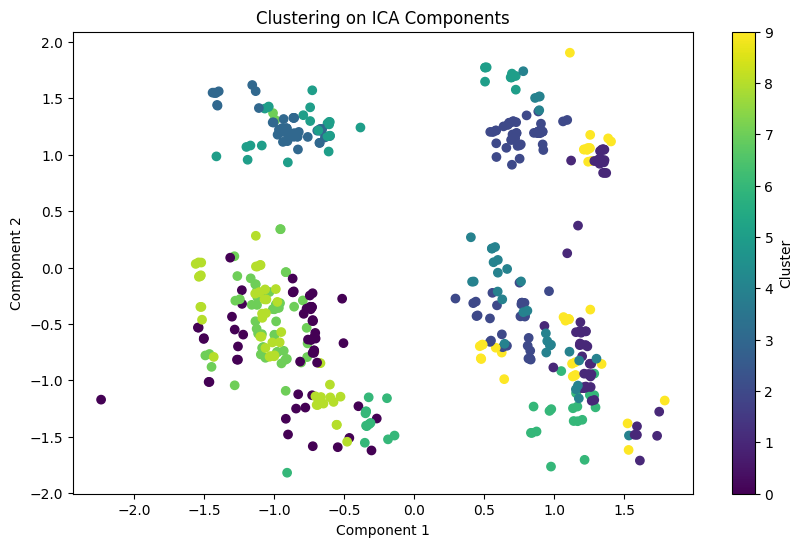

In [40]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 加载数据
file_path = r'C:\Users\isabe\Downloads\visegrad group.csv'
visegrad_data = pd.read_csv(file_path)

# 只选取前500条数据，并立即进行必要的预处理
visegrad_data_subset = visegrad_data.iloc[:500]

# 对分类数据进行独热编码，暂时假设没有需要移除的不相关列
visegrad_data_encoded = pd.get_dummies(visegrad_data_subset)

# 选择数值型特征，因为独热编码后所有特征都可以被视为数值型
numeric_cols = visegrad_data_encoded.columns

# 填充缺失值并标准化数据
imputer = SimpleImputer(strategy='mean').fit(visegrad_data_encoded[numeric_cols])
visegrad_data_imputed = imputer.transform(visegrad_data_encoded[numeric_cols])

scaler = StandardScaler().fit(visegrad_data_imputed)
visegrad_data_scaled = scaler.transform(visegrad_data_imputed)

# 应用ICA
ica = FastICA(n_components=5, random_state=0)
X_transformed = ica.fit_transform(visegrad_data_scaled)

# 转换后的数据转换为DataFrame，并打印前5行
ica_df = pd.DataFrame(X_transformed, columns=[f'Component_{i+1}' for i in range(5)])
print(ica_df.head())

# 聚类分析
range_n_clusters = list(range(2, 11))
silhouette_scores = []

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_transformed)
    silhouette_avg = silhouette_score(X_transformed, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# 选择轮廓系数最高的聚类数
best_n_clusters = range_n_clusters[silhouette_scores.index(max(silhouette_scores))]
kmeans = KMeans(n_clusters=best_n_clusters, random_state=10).fit(X_transformed)
clusters = kmeans.labels_

# 可视化聚类结果
plt.figure(figsize=(10, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=clusters, cmap='viridis', marker='o')
plt.title('Clustering on ICA Components')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar(label='Cluster')
plt.show()


Sparse Random Projection

Dataset-1 facebook_data
r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';'

In [5]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.random_projection import SparseRandomProjection


# 加载数据
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# 选择数值型特征进行处理
numeric_cols = facebook_data.select_dtypes(include=['int64', 'float64']).columns  # 选择数值型列
imputer = SimpleImputer(strategy='mean')
facebook_data[numeric_cols] = imputer.fit_transform(facebook_data[numeric_cols])

# 标准化数值型特征
scaler = StandardScaler()
facebook_data_scaled = scaler.fit_transform(facebook_data[numeric_cols]) 

# 你已经有了facebook_data这个DataFrame
X = facebook_data[numeric_cols].values  # 使用正确的DataFrame和数值型特征

# 由于你之前已经进行了标准化，这里可以直接应用ICA而无需重新标准化
# 应用ICA
ica = FastICA(n_components=5, random_state=0)
X_transformed = ica.fit_transform(X)

# 将转换后的数据转换为DataFrame，方便分析
ica_df = pd.DataFrame(X_transformed, columns=[f'Component_{i+1}' for i in range(5)])


#============================================================================================

# 应用Sparse Random Projection
# 'n_components' 设置为自动，由模型根据提供的 'eps' 来确定
# 'eps' 的一般推荐值在0.1到0.5之间，具体值可能需要根据数据集进行调整
# 之前的eps值太小，导致了维度扩展而非降维
# 尝试使用更大的eps值
srp = SparseRandomProjection(n_components=10, eps=0.5, random_state=42)
facebook_data_projected = srp.fit_transform(facebook_data_scaled)





In [7]:
# Load the dataset to determine which column could be used as the target for modeling
facebook_data = pd.read_csv(r'C:\Users\isabe\Downloads\dataset_Facebook.csv', sep=';')

# Display the first few rows of the dataframe to understand its structure
facebook_data.head()



,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


accuracy非常的低

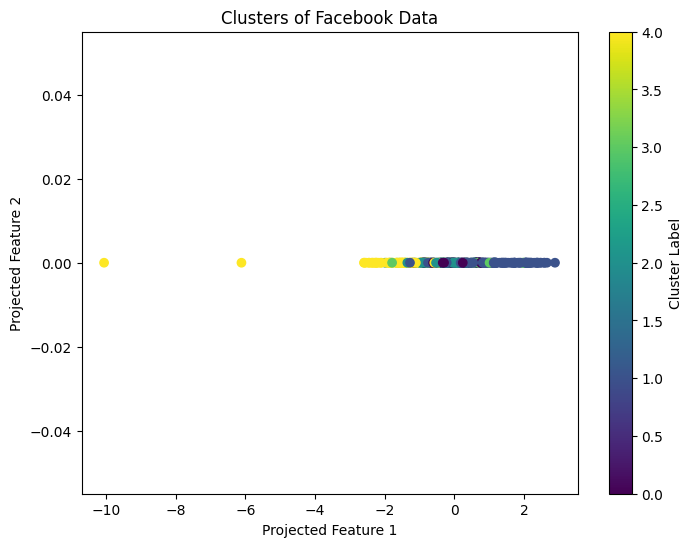

Epoch 1/100


40/40 [==============================] - 1s 1ms/step - loss: nan - accuracy: 0.0075     
Epoch 2/100
40/40 [==============================] - 0s 881us/step - loss: nan - accuracy: 0.0100
Epoch 3/100
40/40 [==============================] - 0s 865us/step - loss: nan - accuracy: 0.0100
Epoch 4/100
40/40 [==============================] - 0s 846us/step - loss: nan - accuracy: 0.0100
Epoch 5/100
40/40 [==============================] - 0s 866us/step - loss: nan - accuracy: 0.0100
Epoch 6/100
40/40 [==============================] - 0s 835us/step - loss: nan - accuracy: 0.0100
Epoch 7/100
40/40 [==============================] - 0s 823us/step - loss: nan - accuracy: 0.0100
Epoch 8/100
40/40 [==============================] - 0s 823us/step - loss: nan - accuracy: 0.0100
Epoch 9/100
40/40 [==============================] - 0s 883us/step - loss: nan - accuracy: 0.0100
Epoch 10/100
40/40 [==============================] - 0s 786us/step - loss: nan - accuracy: 0.0100
Epoch 11/100
4

In [9]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense


# 假设我们选择的K值为5
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(facebook_data_projected)  # 这里假设facebook_data_projected是降维后的数据

# 聚类标签可以添加到数据集中，也可以用于分析
clusters = kmeans.labels_

# 将聚类标签加入到原始数据中
facebook_data['Cluster'] = clusters

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(facebook_data_projected[:, 0], facebook_data_projected[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Facebook Data')
plt.xlabel('Projected Feature 1')
plt.ylabel('Projected Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# 假设现在包括聚类标签的特征集
X = np.hstack((facebook_data_projected, clusters.reshape(-1, 1)))

# 选择目标变量，例如 'like' 列
Y = facebook_data['like'].values

# 再次划分数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=100, batch_size=10)

# 评估模型
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))


優先考慮降低学习率

In [11]:
from keras.optimizers import Adam

# 构建神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 定义一个较小的学习率并编译模型
adam = Adam(learning_rate=0.0001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

# 使用自定义学习率训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=10)

# 评估模型
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))


Epoch 1/100
40/40 [==============================] - 0s 989us/step - loss: nan - accuracy: 0.0050    
Epoch 2/100
40/40 [==============================] - 0s 847us/step - loss: nan - accuracy: 0.0100
Epoch 3/100
40/40 [==============================] - 0s 821us/step - loss: nan - accuracy: 0.0100
Epoch 4/100
40/40 [==============================] - 0s 797us/step - loss: nan - accuracy: 0.0100
Epoch 5/100
40/40 [==============================] - 0s 823us/step - loss: nan - accuracy: 0.0100
Epoch 6/100
40/40 [==============================] - 0s 814us/step - loss: nan - accuracy: 0.0100
Epoch 7/100
40/40 [==============================] - 0s 815us/step - loss: nan - accuracy: 0.0100
Epoch 8/100
40/40 [==============================] - 0s 802us/step - loss: nan - accuracy: 0.0100
Epoch 9/100
40/40 [==============================] - 0s 834us/step - loss: nan - accuracy: 0.0100
Epoch 10/100
40/40 [==============================] - 0s 820us/step - loss: nan - accuracy: 0.0100
Epoch 11/100
40

Dataset-2 visegrad group
r'C:\Users\isabe\Downloads\visegrad group.csv'

In [15]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import FastICA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# 加载数据
file_path = r'C:\Users\isabe\Downloads\visegrad group.csv'
visegrad_data = pd.read_csv(file_path)

# 只选取前500条数据，并立即进行必要的预处理
visegrad_data_subset = visegrad_data.iloc[:500]

# 对分类数据进行独热编码，暂时假设没有需要移除的不相关列
visegrad_data_encoded = pd.get_dummies(visegrad_data_subset)

# 选择数值型特征，因为独热编码后所有特征都可以被视为数值型
numeric_cols = visegrad_data_encoded.columns

# 填充缺失值并标准化数据
imputer = SimpleImputer(strategy='mean').fit(visegrad_data_encoded[numeric_cols])
visegrad_data_imputed = imputer.transform(visegrad_data_encoded[numeric_cols])

scaler = StandardScaler().fit(visegrad_data_imputed)
visegrad_data_scaled = scaler.transform(visegrad_data_imputed)

from sklearn.random_projection import SparseRandomProjection

# 选择特征列进行降维
numeric_features = visegrad_data.select_dtypes(include=[np.number])

# 实例化Sparse Random Projection
# 此处我们假设要将数据降维到2维
srp = SparseRandomProjection(n_components=2, random_state=42)

# 使用已经标准化和填充的数据进行降维
visegrad_data_projected = srp.fit_transform(visegrad_data_scaled)

# 现在你可以继续后续的K-Means聚类等步骤


In [13]:
# Load the dataset to determine which column could be used as the target for modeling
visegrad_data = pd.read_csv(r'C:\Users\isabe\Downloads\visegrad group.csv')

# Display the first few rows of the dataframe to understand its structure
visegrad_data.head()



,Type,CustomerID,Gender,Location,Tenure_Months,Transaction_ID,Transaction_Date,Product_SKU,Product_Description,Product_Category,...,Avg_Price,Delivery_Charges,Coupon_Status,GST,Date,Offline_Spend,Online_Spend,Month,Coupon_Code,Discount_pct
0,0,17850.0,M,Chicago,12.0,16679.0,2019/1/1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
1,1,17850.0,M,Chicago,12.0,16680.0,2019/1/1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
2,2,17850.0,M,Chicago,12.0,16696.0,2019/1/1,GGOENEBQ078999,Nest Cam Outdoor Security Camera - USA,Nest-USA,...,122.77,6.5,Not Used,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
3,3,17850.0,M,Chicago,12.0,16699.0,2019/1/1,GGOENEBQ079099,Nest Protect Smoke + CO White Battery Alarm-USA,Nest-USA,...,81.50,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0
4,4,17850.0,M,Chicago,12.0,16700.0,2019/1/1,GGOENEBJ079499,Nest Learning Thermostat 3rd Gen-USA - Stainle...,Nest-USA,...,153.71,6.5,Clicked,0.1,1/1/2019,4500.0,2424.5,1,ELEC10,10.0


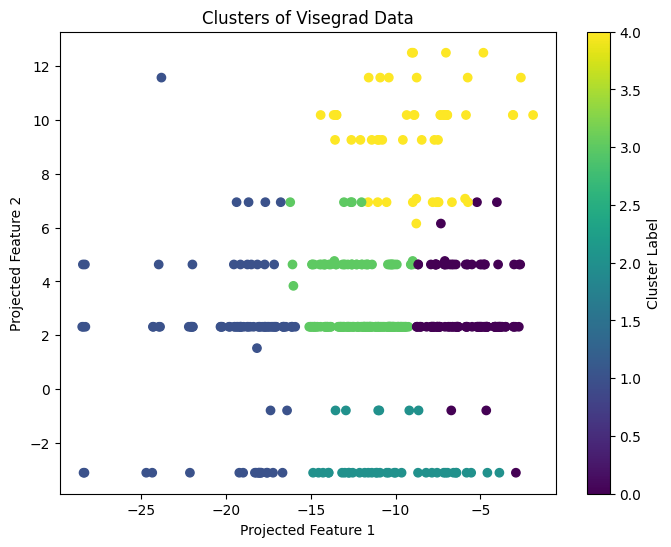

Epoch 1/100
40/40 [==============================] - 0s 818us/step - loss: 15584.7188 - mean_absolute_error: 121.7412
Epoch 2/100
40/40 [==============================] - 0s 814us/step - loss: 11040.0674 - mean_absolute_error: 100.8214
Epoch 3/100
40/40 [==============================] - 0s 879us/step - loss: 4894.9717 - mean_absolute_error: 60.0663
Epoch 4/100
40/40 [==============================] - 0s 808us/step - loss: 2565.9243 - mean_absolute_error: 41.4759
Epoch 5/100
40/40 [==============================] - 0s 841us/step - loss: 2508.6318 - mean_absolute_error: 41.3799
Epoch 6/100
40/40 [==============================] - 0s 809us/step - loss: 2460.6035 - mean_absolute_error: 40.8505
Epoch 7/100
40/40 [==============================] - 0s 769us/step - loss: 2410.6907 - mean_absolute_error: 40.5390
Epoch 8/100
40/40 [==============================] - 0s 821us/step - loss: 2357.5979 - mean_absolute_error: 39.7887
Epoch 9/100
40/40 [==============================] - 0s 857us/step -

In [27]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.random_projection import SparseRandomProjection
from sklearn.cluster import KMeans

# 加载数据
file_path = 'C:\\Users\\isabe\\Downloads\\visegrad group.csv'  # 使用双反斜杠或原始字符串
visegrad_data = pd.read_csv(file_path)

# 只选取前500条数据
visegrad_data_subset = visegrad_data.iloc[:500]

# 分离特征和目标变量，这里假设最后一列是目标
X = visegrad_data_subset.iloc[:, :-1]  # 特征
y = visegrad_data_subset.iloc[:, -1]   # 目标变量，你需要根据你的数据集调整索引

# 识别数值和分类列
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(exclude=['int64', 'float64']).columns

# 创建预处理管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', SimpleImputer(strategy='mean'), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# 应用预处理
X_processed = preprocessor.fit_transform(X)

# 标准化处理后的数据
scaler = StandardScaler(with_mean=False)  # with_mean=False是因为稀疏数据无法中心化
X_scaled = scaler.fit_transform(X_processed)

# 应用Sparse Random Projection进行降维
srp = SparseRandomProjection(n_components=2, random_state=42)
X_projected = srp.fit_transform(X_scaled)

# 应用K-Means聚类
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_projected)

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Visegrad Data')
plt.xlabel('Projected Feature 1')
plt.ylabel('Projected Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

# ...

# 假设现在包括聚类标签的特征集
X = np.hstack((X_projected, clusters.reshape(-1, 1)))

# 确保目标变量 'Y' 也只是前500条数据
Y = visegrad_data_subset['Avg_Price'].values  # 这里的 visegrad_data_subset 已经是前500条数据

# 再次划分数据
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# ...

# 注意：最后一层的激活函数和损失函数应该根据你的问题类型（回归或分类）来选择
# 如果 'Avg_Price' 是一个连续值，并且你正在做回归，你需要使用不同的损失函数和激活函数
# 例如，对于回归问题，你可能会这样修改你的模型：
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
# 对于回归问题，输出层通常有1个神经元，并且不使用激活函数或使用线性激活函数
model.add(Dense(1, activation='linear'))

# 对于回归问题，损失函数通常是 mean_squared_error 或者 mean_absolute_error
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mean_absolute_error'])
model.fit(X_train, Y_train, epochs=100, batch_size=10)

# 评估模型时也应该使用与回归相关的指标
loss, mean_absolute_error = model.evaluate(X_test, Y_test)
print('MAE: %.2f' % mean_absolute_error)


Epoch 1/100


C:\Users\isabe\AppData\Local\Temp\ipykernel_13400\2599357487.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  visegrad_data_subset['Price_Category'] = pd.cut(visegrad_data_subset['Avg_Price'], bins=price_bins, labels=price_labels)


40/40 [==============================] - 0s 1ms/step - loss: 1.0883 - accuracy: 0.5650
Epoch 2/100
40/40 [==============================] - 0s 861us/step - loss: 0.8365 - accuracy: 0.6425
Epoch 3/100
40/40 [==============================] - 0s 798us/step - loss: 0.7880 - accuracy: 0.6650
Epoch 4/100
40/40 [==============================] - 0s 781us/step - loss: 0.7552 - accuracy: 0.7150
Epoch 5/100
40/40 [==============================] - 0s 754us/step - loss: 0.7389 - accuracy: 0.6850
Epoch 6/100
40/40 [==============================] - 0s 780us/step - loss: 0.7128 - accuracy: 0.7300
Epoch 7/100
40/40 [==============================] - 0s 756us/step - loss: 0.7076 - accuracy: 0.7300
Epoch 8/100
40/40 [==============================] - 0s 758us/step - loss: 0.6984 - accuracy: 0.7275
Epoch 9/100
40/40 [==============================] - 0s 767us/step - loss: 0.6916 - accuracy: 0.7200
Epoch 10/100
40/40 [==============================] - 0s 788us/step - loss: 0.6869 - accuracy: 0.7250
Epo

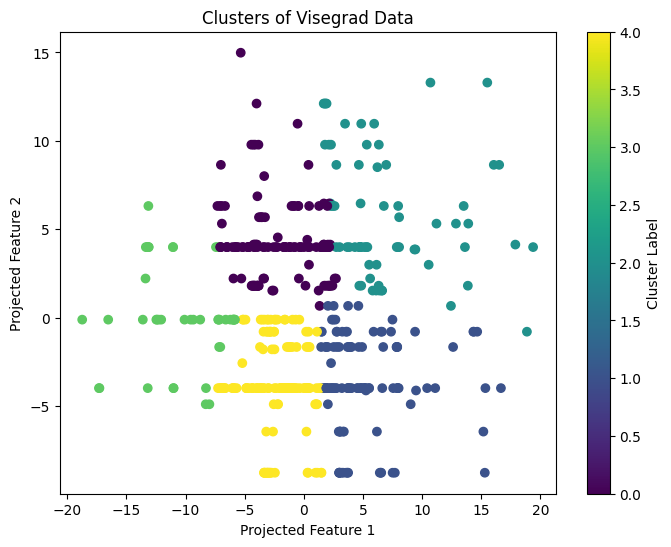

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.cluster import KMeans

# 设定价格区间的边界，这里只是一个例子
price_bins = [0, 50, 100, 150, 200, np.inf]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']

# 使用pandas的cut函数将价格转换为类别
visegrad_data_subset['Price_Category'] = pd.cut(visegrad_data_subset['Avg_Price'], bins=price_bins, labels=price_labels)

# 应用K-Means聚类
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(visegrad_data_projected)

# 将聚类结果合并到特征数据中
X_clustered = np.hstack((visegrad_data_projected, clusters.reshape(-1, 1)))

# 确保OneHotEncoder编码所有可能的类别
encoder = OneHotEncoder(categories=[price_labels])

# 用fit_transform来转换训练集，transform来转换测试集，以保证一致性
Y_encoded = encoder.fit_transform(visegrad_data_subset['Price_Category'].values.reshape(-1, 1)).toarray()

# 确保使用相同的变量名
X_train, X_test, Y_train, Y_test = train_test_split(X_clustered, Y_encoded, test_size=0.2, random_state=42)

# 构建神经网络模型
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(len(price_labels), activation='softmax'))  # 确保这里是5

# 编译模型
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 训练模型
model.fit(X_train, Y_train, epochs=100, batch_size=10)

# 评估模型
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy * 100))

# 可视化聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_clustered[:, 0], X_clustered[:, 1], c=clusters, cmap='viridis')
plt.title('Clusters of Visegrad Data')
plt.xlabel('Projected Feature 1')
plt.ylabel('Projected Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()



Dataset - 3 employment Data(Assignment Data)

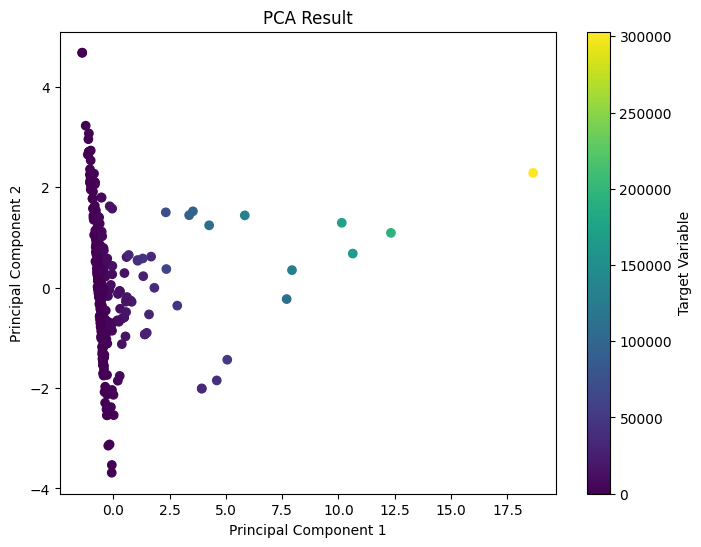

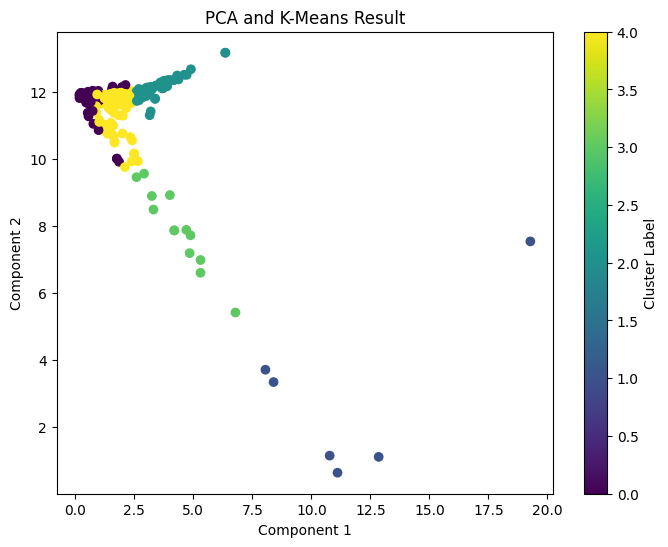

In [45]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor  # 导入MLPRegressor
import matplotlib.pyplot as plt

# 加载数据
file_path = r'C:\Users\isabe\Downloads\employment_data.csv'
data = pd.read_csv(file_path)

# 分离特征和目标变量（如果有）
X = data.drop('percent_hours_lost_40hrs_per_week', axis=1)  # 假设你有一个目标列需要先删除
y = data['percent_hours_lost_40hrs_per_week']  # 如果有的话

# 识别数值和分类特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 创建预处理和PCA管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features),
    ])

# 创建PCA对象时指定求解器为'arpack'
pca = PCA(n_components=2, svd_solver='arpack')

from sklearn.decomposition import TruncatedSVD

# 创建TruncatedSVD对象
svd = TruncatedSVD(n_components=2)

# 修改管道中的PCA为TruncatedSVD
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('svd', svd)])
                           
# 可视化降维结果
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Result')
plt.colorbar(label='Target Variable')
plt.show()


from sklearn.cluster import KMeans

# 创建KMeans对象
kmeans = KMeans(n_clusters=5, random_state=42)

# 修改管道中的PCA为TruncatedSVD，并添加KMeans步骤
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svd', svd),
                           ('kmeans', kmeans)])

# 应用管道
X_transformed = pipeline.fit_transform(X)

# 可视化降维和聚类结果
plt.figure(figsize=(8, 6))
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=pipeline.named_steps['kmeans'].labels_, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA and K-Means Result')
plt.colorbar(label='Cluster Label')
plt.show()


c:\Users\isabe\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Accuracy: -0.001554383197370779


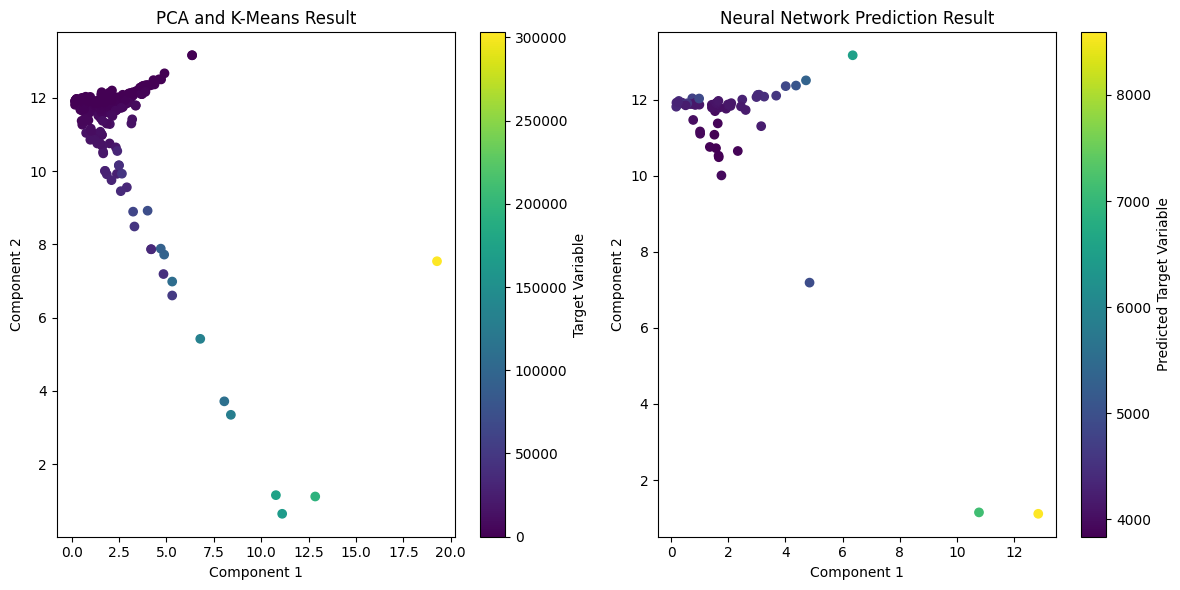

In [47]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 加载数据
file_path = r'C:\Users\isabe\Downloads\employment_data.csv'
data = pd.read_csv(file_path)

# 分离特征和目标变量（如果有）
X = data.drop('percent_hours_lost_40hrs_per_week', axis=1)  # 假设你有一个目标列需要先删除
y = data['percent_hours_lost_40hrs_per_week']  # 如果有的话

# 识别数值和分类特征
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# 创建预处理和PCA管道
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore'))]), categorical_features),
    ])

# 创建PCA对象时指定求解器为'arpack'
pca = PCA(n_components=2, svd_solver='arpack')

# 创建TruncatedSVD对象
svd = TruncatedSVD(n_components=2)

# 创建KMeans对象
kmeans = KMeans(n_clusters=5, random_state=42)

# 修改管道中的PCA为TruncatedSVD，并添加KMeans步骤
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('svd', svd),
                           ('kmeans', kmeans)])

# 应用管道
X_transformed = pipeline.fit_transform(X)

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size=0.2, random_state=42)

# 构建神经网络模型
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', random_state=42)

# 训练模型
model.fit(X_train, y_train)

# 在测试集上评估模型
accuracy = model.score(X_test, y_test)
print('Accuracy:', accuracy)

# 可视化降维和聚类结果
plt.figure(figsize=(12, 6))

# 绘制降维结果
plt.subplot(1, 2, 1)
plt.scatter(X_transformed[:, 0], X_transformed[:, 1], c=y, cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('PCA and K-Means Result')
plt.colorbar(label='Target Variable')

# 绘制神经网络预测结果
plt.subplot(1, 2, 2)
plt.scatter(X_test[:, 0], X_test[:, 1], c=model.predict(X_test), cmap='viridis')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Neural Network Prediction Result')
plt.colorbar(label='Predicted Target Variable')

plt.tight_layout()
plt.show()
